# AMPSphere v.2022-03

This is a notebook meant to form the set of notebooks used to analyze the data in AMPSphere and write the manuscript:

__AMPSphere: Global survey of prokaryotic antimicrobial peptides shaping microbiomes__

### GMGC v.1 homolog c_AMPs 

Here, we show how c_AMPs from AMPSphere are aligned to homolog large proteins from GMGC, their features and
distribution.


In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import log

In [2]:
# loading data
gmgc = pd.DataFrame()
for record in pd.read_table('data/result_gmgc.m8.xz',
                            header=None,
                            chunksize=1_000_000):
    gmgc = pd.concat([gmgc, record])

gmgc.columns = ['query', 'target', 'evalue',
                'gapopen', 'pident', 'nident', 
                'qstart', 'qend', 'qlen',
                'tstart', 'tend', 'tlen',
                'alnlen', 'raw', 'bits',
                'cigar', 'qseq', 'tseq',
                'qheader', 'theader', 'qaln',
                'taln', 'qframe', 'tframe',
                'mismatch', 'qcov', 'tcov']

In [3]:
# creating some measures
gmgc['pct_start'] = gmgc['tstart'] * 100 / gmgc['tlen']
gmgc['pct_end'] = gmgc['tend'] * 100 / gmgc['tlen']
gmgc['pct_amp'] = (1 + gmgc.qend - gmgc.qstart)*100 / gmgc.qlen

In [4]:
# histogram of pct_start
gmgc = gmgc.sort_values(
    by=['evalue', 'bits', 'pident'],
    ascending=[True, False, False]
)

df = gmgc.groupby('query').head(1)
# df.to_csv('filtered_gmgc_homologs.tsv.gz', sep='\t', header=True, index=None)

Text(-2.700000000000003, 0.5, 'Counts')

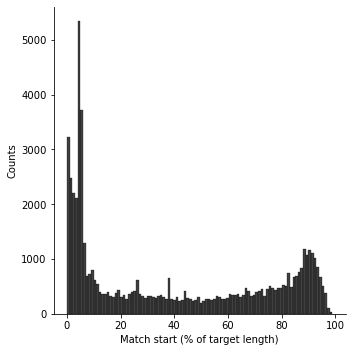

In [5]:
sns.displot(data=df,
            x='pct_start',
            bins=100, 
            color='black')

plt.xlabel('Match start (% of target length)')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

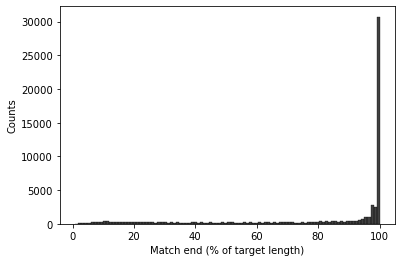

In [6]:
sns.histplot(data=df,
             x='pct_end',
             bins=100, 
             color='black')

plt.xlabel('Match end (% of target length)')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

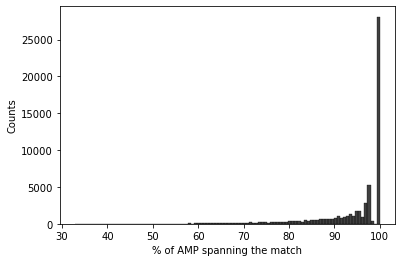

In [7]:
sns.histplot(data=df,
             x='pct_amp',
             bins=100, 
             color='black')

plt.xlabel('% of AMP spanning the match')
plt.ylabel('Counts')

In [8]:
f = df[(df.pct_start <= 25)|(df.pct_start >= 75)]
f = len(f) * 100 / len(df)

print(f'{f:.2}% of hits begin in the initial or final 25% of target protein')

7.3e+01% of hits begin in the initial or final 25% of target protein


### Enrichment of ortholog groups among the homologs

In [9]:
data = pd.read_table('data/adjust_significant_function.csv.xz',
                     sep='\t',
                     header='infer')

data = data.sort_values(by='times')

print(f'It was found {len(data)} OGs in the c_AMP homologs set')
print(f'{len(data[data.p_adjust < 0.05])} OGs were significantly enriched')

It was found 43789 OGs in the c_AMP homologs set
3873 OGs were significantly enriched


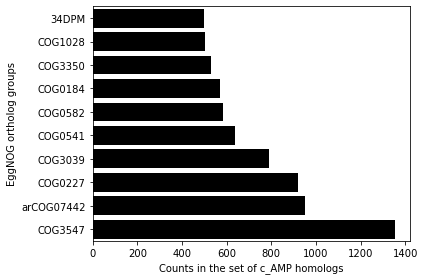

In [10]:
sns.barplot(data=data.sort_values(by='count_AMP').tail(10),
            x='count_AMP',
            y='eggnog_OG',
            orient='h',
            color='black')

plt.xlabel('Counts in the set of c_AMP homologs')
plt.ylabel('EggNOG ortholog groups')
plt.tight_layout()

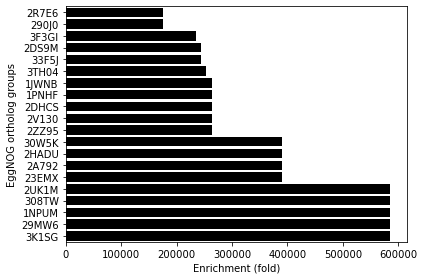

In [11]:
sns.barplot(data=data.tail(20),
            x='times',
            y='eggnog_OG',
            orient='h',
            color='black')

plt.xlabel('Enrichment (fold)')
plt.ylabel('EggNOG ortholog groups')
plt.tight_layout()